<a href="https://colab.research.google.com/github/asprihashri/MachineLearning_using_Python/blob/master/nlpinternship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot

In [ ]:
import nltk
from nltk.stem import PorterStemmer
import re
import string
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS
from string import punctuation
from bs4 import BeautifulSoup
import re,string,unicodedata
from nltk import pos_tag
from nltk.corpus import wordnet, stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/internship project ineuron/training_set_rel3.tsv/training_set_rel3.tsv',sep='\t', encoding='ISO-8859-1',error_bad_lines=False)

In [ ]:
data.head(5)

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,rater1_trait1,rater1_trait2,rater1_trait3,rater1_trait4,rater1_trait5,rater1_trait6,rater2_trait1,rater2_trait2,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4,4,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.isnull().sum()

essay_id              0
essay_set             0
essay                 0
rater1_domain1        0
rater2_domain1        0
rater3_domain1    12848
domain1_score         0
rater1_domain2    11176
rater2_domain2    11176
domain2_score     11176
rater1_trait1     10684
rater1_trait2     10684
rater1_trait3     10684
rater1_trait4     10684
rater1_trait5     12253
rater1_trait6     12253
rater2_trait1     10684
rater2_trait2     10684
rater2_trait3     10684
rater2_trait4     10684
rater2_trait5     12253
rater2_trait6     12253
rater3_trait1     12848
rater3_trait2     12848
rater3_trait3     12848
rater3_trait4     12848
rater3_trait5     12848
rater3_trait6     12848
dtype: int64

In [ ]:
data.dropna(axis = 1, inplace = True)
data.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,domain1_score
0,1,1,"Dear local newspaper, I think effects computer...",4,4,8
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,9
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,7
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,10
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,8


In [ ]:
print(data['essay'])

0        Dear local newspaper, I think effects computer...
1        Dear @CAPS1 @CAPS2, I believe that using compu...
2        Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...
3        Dear Local Newspaper, @CAPS1 I have found that...
4        Dear @LOCATION1, I know having computers has a...
                               ...                        
12971     In most stories mothers and daughters are eit...
12972     I never understood the meaning laughter is th...
12973    When you laugh, is @CAPS5 out of habit, or is ...
12974                                   Trippin' on fen...
12975     Many people believe that laughter can improve...
Name: essay, Length: 12976, dtype: object


In [ ]:
from nltk.tokenize import sent_tokenize

data_words = data['essay'].apply(sent_tokenize)
data_words.head()

0    [Dear local newspaper, I think effects compute...
1    [Dear @CAPS1 @CAPS2, I believe that using comp...
2    [Dear, @CAPS1 @CAPS2 @CAPS3 More and more peop...
3    [Dear Local Newspaper, @CAPS1 I have found tha...
4    [Dear @LOCATION1, I know having computers has ...
Name: essay, dtype: object

In [ ]:
from nltk.tokenize import word_tokenize
data_words1 = data['essay'].apply(word_tokenize)
data_words1.head()

0    [Dear, local, newspaper, ,, I, think, effects,...
1    [Dear, @, CAPS1, @, CAPS2, ,, I, believe, that...
2    [Dear, ,, @, CAPS1, @, CAPS2, @, CAPS3, More, ...
3    [Dear, Local, Newspaper, ,, @, CAPS1, I, have,...
4    [Dear, @, LOCATION1, ,, I, know, having, compu...
Name: essay, dtype: object

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
from nltk.stem import WordNetLemmatizer
ps = WordNetLemmatizer()
corps = []
for i in range(0, len(data_words1)):
    review = re.sub('[^a-zA-Z]', ' ', str(data_words1[i]))
    review = review.lower()
    review = review.split()
    review = [ps.lemmatize(word) for word in review if not word in stopwords.words('english')] 
    review = ' '.join(review)
    corps.append(review)

In [21]:
corps[1]

'dear cap cap believe using computer benefit u many way like talking becoming friend others website like facebook mysace using computer help u find coordibates location able ourselfs million information also computer benefit u helping job planning house plan typing num page report one job le writing let go wonder world technology using computer help u life talking making friend line many people myspace facebooks aim benefit u conversation one another many people believe computer bad make friend never talk fortunate computer help school work social life make friend computer help u finding location coordibates million information online n go internet lot would n know go onto website month help u location coordinate like location would rather use computer location supposed vacationing location million information found internet almost every question computer would rather easily draw house plan computer take num hour one hand ugly erazer mark garrenteed find job drawing like also appling j

In [22]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english') # To find list of stop words of english

word_frequencies = {}

for word in nltk.word_tokenize(str(corps)):
    if word not in stopwords:
        if word not in word_frequencies.keys():
            word_frequencies[word] = 1
        else:
            word_frequencies[word]+=1

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
word_frequencies

{'[': 1,
 "'dear": 1236,
 'local': 668,
 'newspaper': 853,
 'think': 7748,
 'effect': 1939,
 'computer': 19992,
 'people': 21110,
 'great': 2549,
 'learning': 760,
 'skill': 585,
 'affect': 1624,
 'give': 2531,
 'u': 4805,
 'time': 11160,
 'chat': 679,
 'friend': 6767,
 'new': 4228,
 'help': 4466,
 'learn': 2803,
 'globe': 46,
 'astronomy': 1,
 'keep': 2260,
 'troble': 9,
 'thing': 10588,
 'dont': 1464,
 'would': 15042,
 'feel': 2741,
 'teenager': 395,
 'always': 3480,
 'phone': 769,
 'ever': 1913,
 'buisness': 76,
 'partner': 52,
 'well': 2347,
 'way': 6882,
 'plenty': 115,
 'site': 432,
 'internet': 1508,
 'organization': 3566,
 'cap': 36521,
 'facebook': 530,
 'myspace': 244,
 'ect': 190,
 'setting': 2261,
 'meeting': 167,
 'bos': 62,
 'fun': 1737,
 'rushing': 82,
 'get': 9666,
 'cause': 1373,
 'want': 5432,
 'use': 3770,
 'country': 1447,
 'state': 5048,
 'outside': 1575,
 'going': 4828,
 'might': 1919,
 'child': 5480,
 'spends': 64,
 'lot': 2856,
 'ask': 690,
 'question': 563,
 'e

In [24]:
maximum_frequency = max(word_frequencies.values())
maximum_frequency

36521

In [25]:
weighted_frequencies={}
for word in word_frequencies.keys():
    weighted_frequencies[word] = (word_frequencies[word]/maximum_frequency)

In [26]:
weighted_frequencies

{'[': 2.7381506530489306e-05,
 "'dear": 0.03384354207168479,
 'local': 0.018290846362366858,
 'newspaper': 0.023356425070507378,
 'think': 0.21215191259823116,
 'effect': 0.053092741162618765,
 'computer': 0.5474110785575422,
 'people': 0.5780236028586293,
 'great': 0.06979546014621725,
 'learning': 0.020809944963171872,
 'skill': 0.016018181320336247,
 'affect': 0.04446756660551464,
 'give': 0.06930259302866844,
 'u': 0.13156813887900112,
 'time': 0.3055776128802607,
 'chat': 0.01859204293420224,
 'friend': 0.18529065469182115,
 'new': 0.11576900961090879,
 'help': 0.12228580816516525,
 'learn': 0.07675036280496153,
 'globe': 0.0012595493004025082,
 'astronomy': 2.7381506530489306e-05,
 'keep': 0.06188220475890584,
 'troble': 0.00024643355877440376,
 'thing': 0.2899153911448208,
 'dont': 0.04008652556063635,
 'would': 0.41187262123162016,
 'feel': 0.0750527094000712,
 'teenager': 0.010815695079543277,
 'always': 0.0952876427261028,
 'phone': 0.02105637852194628,
 'ever': 0.05238082199

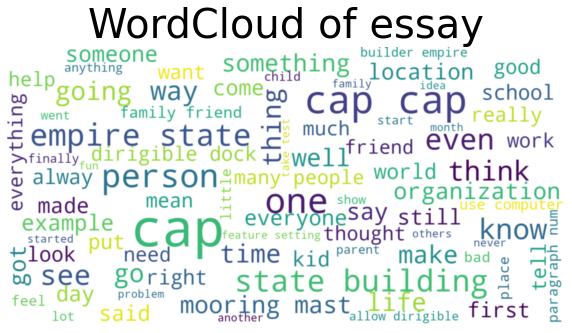

In [27]:
word_cloud = WordCloud(
                       width=1600,
                       height=800, 
                       margin=0,
                       max_words=500, # Maximum numbers of words we want to see 
                       max_font_size=150, min_font_size=30,  # Font size range
                       background_color="white"
            ).generate(" ".join(corps))

plt.figure(figsize=(10, 16))
plt.imshow(word_cloud, interpolation="gaussian")
plt.title('WordCloud of essay', fontsize = 40)
plt.axis("off")
plt.show()

In [28]:
# Preprocessing the train set

data['essay'] = corps

data.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,domain1_score
0,1,1,dear local newspaper think effect computer peo...,4,4,8
1,2,1,dear cap cap believe using computer benefit u ...,5,4,9
2,3,1,dear cap cap cap people use computer everyone ...,4,3,7
3,4,1,dear local newspaper cap found many expert say...,5,5,10
4,5,1,dear location know computer positive effect pe...,4,4,8


In [29]:
data.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,domain1_score
0,1,1,dear local newspaper think effect computer peo...,4,4,8
1,2,1,dear cap cap believe using computer benefit u ...,5,4,9
2,3,1,dear cap cap cap people use computer everyone ...,4,3,7
3,4,1,dear local newspaper cap found many expert say...,5,5,10
4,5,1,dear location know computer positive effect pe...,4,4,8


In [30]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
cv.fit_transform(corps)
print("bag of words :",cv.get_feature_names())
cv

bag of words : ['abandoned', 'abhor', 'abhor also', 'abhor also exactly', 'ability', 'ability learn', 'ability learn faraway', 'able', 'able find', 'able get', 'able go', 'able read', 'able see', 'able take', 'able talk', 'absolutely', 'abuse', 'accept', 'acceptable', 'access', 'accident', 'accident could', 'accident could taken', 'accommodate', 'accommodate new', 'accommodate new situation', 'accomplish', 'according', 'account', 'acid', 'across', 'act', 'acting', 'action', 'active', 'activity', 'actor', 'actual', 'actually', 'adapt', 'adapt new', 'adapting', 'add', 'add stress', 'add stress building', 'added', 'addicted', 'addicted computer', 'addicting', 'addiction', 'adding', 'addition', 'address', 'adjust', 'admiration', 'admiration strength', 'adore', 'adore day', 'adult', 'adult book', 'adult section', 'advance', 'advance technology', 'advanced', 'advancement', 'advantage', 'adventure', 'advice', 'affect', 'affect cyclist', 'affect cyclist many', 'affect people', 'affected', 'aff

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=5000, min_df=1,
                ngram_range=(1, 3), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfid = TfidfVectorizer(smooth_idf=False)

doc_vector = tfid.fit_transform(corps)
#print(tfid.get_feature_names())
tf= pd.DataFrame(doc_vector.todense(),columns=tfid.get_feature_names())
tf

,aa,aamerica,aamous,aand,aare,aase,aasked,ab,aback,abad,abadond,abait,abalt,abanded,abandon,abandond,abandone,abandoned,abandoness,abandoning,abandonment,abandonned,abandured,abanodoned,abanoned,abat,abbandon,abbanond,abbreviated,abc,abd,abdomen,abdominal,abducted,abduction,abe,abease,abeast,abel,abenefit,...,yum,yummy,yung,yuo,yuorself,yup,yurt,yuuth,zack,zap,zapzone,zazin,zealot,zealously,zebra,zeplin,zeppelin,zepplen,zepplin,zepplins,zero,zest,zines,zing,zingbobway,zinged,zip,zipo,zipper,zipping,zombi,zombie,zone,zoned,zoning,zoo,zoom,zoomed,zooming,zzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.070018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12971,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12972,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12973,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.067002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corps).toarray()

In [33]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [35]:
df=pd.read_csv('/content/drive/MyDrive/internship project ineuron/test_set.tsv/test_set.tsv',sep='\t', encoding='ISO-8859-1')
df.head()

,essay_id,essay_set,essay,domain1_predictionid,domain2_predictionid
0,2383,1,I believe that computers have a positive effec...,2383,NaN
1,2384,1,"Dear @CAPS1, I know some problems have came up...",2384,NaN
2,2385,1,"Dear to whom it @MONTH1 concern, Computers are...",2385,NaN
3,2386,1,"Dear @CAPS1 @CAPS2, @CAPS3 has come to my atte...",2386,NaN
4,2387,1,"Dear Local newspaper, I think that people have...",2387,NaN


In [36]:
df.isnull().sum()

essay_id                   0
essay_set                  0
essay                      0
domain1_predictionid       0
domain2_predictionid    3654
dtype: int64

In [37]:
df.dropna(axis = 1, inplace = True)

In [38]:
df.isnull().sum()

essay_id                0
essay_set               0
essay                   0
domain1_predictionid    0
dtype: int64

In [39]:
df.head()

,essay_id,essay_set,essay,domain1_predictionid
0,2383,1,I believe that computers have a positive effec...,2383
1,2384,1,"Dear @CAPS1, I know some problems have came up...",2384
2,2385,1,"Dear to whom it @MONTH1 concern, Computers are...",2385
3,2386,1,"Dear @CAPS1 @CAPS2, @CAPS3 has come to my atte...",2386
4,2387,1,"Dear Local newspaper, I think that people have...",2387


In [40]:
print(df['essay'])

0       I believe that computers have a positive effec...
1       Dear @CAPS1, I know some problems have came up...
2       Dear to whom it @MONTH1 concern, Computers are...
3       Dear @CAPS1 @CAPS2, @CAPS3 has come to my atte...
4       Dear Local newspaper, I think that people have...
                              ...                        
4249    Just One @CAPS1 @CAPS2 can bring people togeth...
4250     @CAPS8 Was my first time going to the band ca...
4251    Laughter is one of the most important things i...
4252                                    A @CAPS1 Of @C...
4253      Good @CAPS1 In @LOCATION1.  Every year a sel...
Name: essay, Length: 4254, dtype: object


In [41]:


df_words = df['essay'].apply(sent_tokenize)
df_words.head()

0    [I believe that computers have a positive effe...
1    [Dear @CAPS1, I know some problems have came u...
2    [Dear to whom it @MONTH1 concern, Computers ar...
3    [Dear @CAPS1 @CAPS2, @CAPS3 has come to my att...
4    [Dear Local newspaper, I think that people hav...
Name: essay, dtype: object

In [42]:
df_words1 = df['essay'].apply(word_tokenize)
df_words1.head()

0    [I, believe, that, computers, have, a, positiv...
1    [Dear, @, CAPS1, ,, I, know, some, problems, h...
2    [Dear, to, whom, it, @, MONTH1, concern, ,, Co...
3    [Dear, @, CAPS1, @, CAPS2, ,, @, CAPS3, has, c...
4    [Dear, Local, newspaper, ,, I, think, that, pe...
Name: essay, dtype: object

In [43]:
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [44]:
from nltk.stem import WordNetLemmatizer
ps = WordNetLemmatizer()
corpus1 = []
for i in range(0, len(df_words1)):
    review = re.sub('[^a-zA-Z]', ' ', str(df_words1[i]))
    review = review.lower()
    review = review.split()
    review = [ps.lemmatize(word) for word in review if not word in stopwords.words('english')] 
    review = ' '.join(review)
    corpus1.append(review)

In [45]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english') # To find list of stop words of english

words_frequencies = {}

for word in nltk.word_tokenize(str(corpus1)):
    if word not in stopwords:
        if word not in words_frequencies.keys():
            words_frequencies[word] = 1
        else:
            words_frequencies[word]+=1

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [46]:
words_frequencies

{'[': 1,
 "'believe": 77,
 'computer': 6527,
 'positive': 349,
 'effect': 638,
 'people': 7033,
 'help': 1429,
 'stay': 366,
 'touch': 142,
 'family': 2341,
 'couple': 155,
 'different': 840,
 'way': 2141,
 'excercise': 28,
 'mind': 342,
 'hand': 705,
 'learn': 920,
 'make': 2075,
 'thing': 3689,
 'easier': 212,
 'keep': 714,
 'say': 1683,
 'live': 370,
 'location': 1283,
 'miss': 128,
 'cap': 12299,
 'send': 100,
 'e': 64,
 'mail': 87,
 'talk': 1049,
 'want': 1876,
 'n': 4191,
 'limit': 274,
 'word': 450,
 'add': 185,
 'picture': 287,
 'see': 1553,
 'much': 1434,
 'grown': 57,
 'well': 742,
 'even': 1752,
 'mailing': 8,
 'someone': 931,
 'block': 55,
 'effective': 11,
 'getting': 595,
 'walking': 135,
 'also': 2629,
 'use': 1221,
 'scrap': 3,
 'book': 4567,
 'card': 54,
 'slide': 27,
 'show': 1163,
 'love': 960,
 'person': 2818,
 'give': 858,
 'month': 1085,
 'whole': 404,
 'body': 157,
 'excersises': 1,
 'could': 2882,
 'play': 504,
 'solitaire': 2,
 'come': 1054,
 'away': 985,
 'per

In [47]:
max_frequency = max(words_frequencies.values())
max_frequency

12299

In [48]:
weight_frequencies={}
for word in words_frequencies.keys():
    weight_frequencies[word] = (words_frequencies[word]/max_frequency)

In [49]:
weight_frequencies

{'[': 8.130742336775348e-05,
 "'believe": 0.006260671599317018,
 'computer': 0.530693552321327,
 'positive': 0.028376290755345965,
 'effect': 0.05187413610862672,
 'people': 0.5718351085454102,
 'help': 0.11618830799251972,
 'stay': 0.029758516952597774,
 'touch': 0.011545654118220994,
 'family': 0.1903406781039109,
 'couple': 0.012602650622001789,
 'different': 0.06829823562891292,
 'way': 0.17407919343036019,
 'excercise': 0.0022766078542970974,
 'mind': 0.02780713879177169,
 'hand': 0.0573217334742662,
 'learn': 0.0748028294983332,
 'make': 0.16871290348808846,
 'thing': 0.29994308480364257,
 'easier': 0.017237173753963737,
 'keep': 0.05805350028457598,
 'say': 0.1368403935279291,
 'live': 0.030083746646068787,
 'location': 0.1043174241808277,
 'miss': 0.010407350191072445,
 'cap': 1.0,
 'send': 0.008130742336775347,
 'e': 0.005203675095536223,
 'mail': 0.007073745832994552,
 'talk': 0.0852914871127734,
 'want': 0.1525327262379055,
 'n': 0.3407594113342548,
 'limit': 0.0222782340027

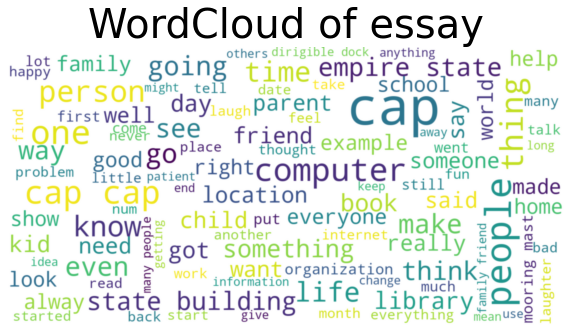

In [50]:
word_cloud = WordCloud(
                       width=1600,
                       height=800, 
                       margin=0,
                       max_words=500, # Maximum numbers of words we want to see 
                       max_font_size=150, min_font_size=30,  # Font size range
                       background_color="white"
            ).generate(" ".join(corpus1))

plt.figure(figsize=(10, 16))
plt.imshow(word_cloud, interpolation="gaussian")
plt.title('WordCloud of essay', fontsize = 40)
plt.axis("off")
plt.show()

In [51]:
df['essay'] = corpus1

In [52]:
df.head()

,essay_id,essay_set,essay,domain1_predictionid
0,2383,1,believe computer positive effect people help s...,2383
1,2384,1,dear cap know problem came individual agree be...,2384
2,2385,1,dear month concern computer n reason people n ...,2385
3,2386,1,dear cap cap cap come attention people believe...,2386
4,2387,1,dear local newspaper think people lately spent...,2387


In [53]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
cv.fit_transform(corpus1)
print("bag of words :",cv.get_feature_names())
cv

bag of words : ['abandoned', 'ability', 'ability learn', 'ability learn faraway', 'able', 'able find', 'able get', 'able go', 'able make', 'able read', 'able see', 'able talk', 'absolutely', 'abuse', 'accept', 'acceptable', 'accepted', 'access', 'accident', 'accident could', 'accommodate', 'accommodate new', 'accommodate new situation', 'accomplish', 'according', 'account', 'accurate', 'achieve', 'acid', 'across', 'across world', 'act', 'acting', 'action', 'active', 'activity', 'actual', 'actually', 'adapt', 'adapting', 'add', 'add stress', 'add stress building', 'added', 'addicted', 'addicted computer', 'addicting', 'addiction', 'adding', 'addition', 'adjust', 'admiration', 'admiration strength', 'admiration strength perseverance', 'adore', 'adore day', 'adult', 'adult book', 'adult section', 'advance', 'advance technology', 'advanced', 'advancement', 'advantage', 'adventure', 'advice', 'affect', 'affect cyclist', 'affect cyclist many', 'affect people', 'affected', 'affected cyclist',

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=5000, min_df=1,
                ngram_range=(1, 3), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfid = TfidfVectorizer(smooth_idf=False)

doc_vector = tfid.fit_transform(corps)
#print(tfid.get_feature_names())
tf= pd.DataFrame(doc_vector.todense(),columns=tfid.get_feature_names())
tf

,aa,aamerica,aamous,aand,aare,aase,aasked,ab,aback,abad,abadond,abait,abalt,abanded,abandon,abandond,abandone,abandoned,abandoness,abandoning,abandonment,abandonned,abandured,abanodoned,abanoned,abat,abbandon,abbanond,abbreviated,abc,abd,abdomen,abdominal,abducted,abduction,abe,abease,abeast,abel,abenefit,...,yum,yummy,yung,yuo,yuorself,yup,yurt,yuuth,zack,zap,zapzone,zazin,zealot,zealously,zebra,zeplin,zeppelin,zepplen,zepplin,zepplins,zero,zest,zines,zing,zingbobway,zinged,zip,zipo,zipper,zipping,zombi,zombie,zone,zoned,zoning,zoo,zoom,zoomed,zooming,zzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.070018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12971,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12972,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12973,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.067002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
Y=tfidf_v.fit_transform(corps).toarray()

In [56]:
Y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [57]:
y = data['domain1_score']

In [59]:
data.shape

(12976, 6)

In [61]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [62]:
data['essay_set'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8])

In [63]:
print(data.groupby('essay_set').size())

essay_set
1    1783
2    1800
3    1726
4    1770
5    1805
6    1800
7    1569
8     723
dtype: int64


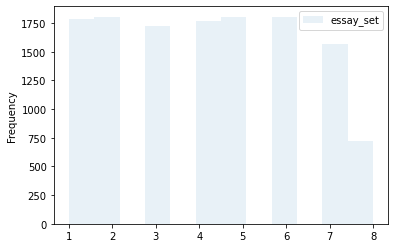

In [64]:
data.plot.hist(x='essay', y='essay_set',alpha=0.1, bins = 12)

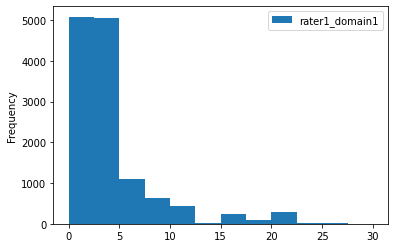

In [66]:
data.plot.hist(x='essay',y='rater1_domain1',bins=12)

In [67]:
data.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,domain1_score
0,1,1,dear local newspaper think effect computer peo...,4,4,8
1,2,1,dear cap cap believe using computer benefit u ...,5,4,9
2,3,1,dear cap cap cap people use computer everyone ...,4,3,7
3,4,1,dear local newspaper cap found many expert say...,5,5,10
4,5,1,dear location know computer positive effect pe...,4,4,8


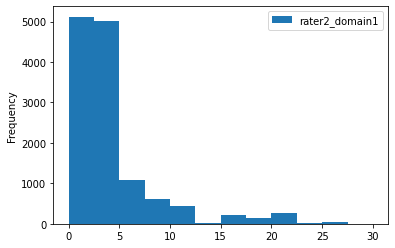

In [68]:
data.plot.hist(x='essay', y='rater2_domain1', bins=12)

In [83]:
from sklearn import metrics
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [87]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()

accuracy:   0.296


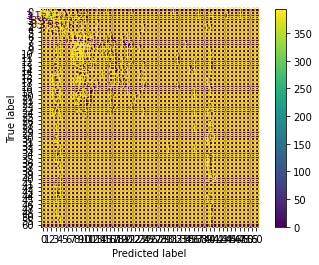

In [88]:
 classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(classifier,X_test,y_test)
plt.show()

In [82]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.3621293485874387

In [89]:
import pandas as pd
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).



In [91]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')